<a href="https://colab.research.google.com/github/SLTH-Project/ThaiSignLanguage/blob/main/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import

In [64]:
from PIL import ImageFilter 
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

In [65]:
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator

In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from PIL import Image

In [67]:
from skimage.transform import resize
from sklearn.model_selection import train_test_split

#Path

In [6]:
# path read
rootRead_dir = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original'
rootSubFloderName=['/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/zero',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/one',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/two',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/three',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/four',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/five',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/six',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/seven',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/eight',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/nine',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/add',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/animal',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/bowl',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/buffalo',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/care',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/cat',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/chest',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/cow',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/deer',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/divide',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/double',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/elbow',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/eye',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/finger',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/gun',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/hair',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/hand',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/he',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/head',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/love',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/me',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/meditate',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/mushroom',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/noon',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/nose',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/rat',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/remember',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/rhinoceros',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/salty',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/serve',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/shirt',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/shoulder',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/sick',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/soldier',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/teeth',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/tiger',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/time',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/tongue',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/wedding',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/win'
                ]
# path save
rootSave_dir = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50'
saveSubFloderName =['/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/zero',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/one',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/two',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/three',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/four',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/five',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/six',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/seven',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/eight',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/nine',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/add',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/animal',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/bowl',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/buffalo',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/care',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/cat',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/chest',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/cow',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/deer',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/divide',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/double',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/elbow',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/eye',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/finger',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/gun',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/hair',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/hand',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/he',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/head',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/love',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/me',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/meditate',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/mushroom',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/noon',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/nose',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/rat',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/remember',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/rhinoceros',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/salty',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/serve',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/shirt',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/shoulder',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/sick',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/soldier',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/teeth',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/tiger',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/time',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/tongue',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/wedding',
                '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/win'
                ]

size=224

#Resize

In [ ]:
def Resize (size,rootSubFloderName,rootSave_dir,saveSubFloderName): 
  # create path for save
  countPath=0
  if not os.path.exists(rootSave_dir):
    os.makedirs(rootSave_dir)
    #print('create root dir for save :',save_dir) 
  for subdir_new in saveSubFloderName: 
    os.makedirs(subdir_new)
    #print('create save sub floder :',subdir_new)

  # read and save
  i=0
  for subdir_root in rootSubFloderName: 
    countPath = countPath + 1
    print('\nClass: ',countPath,'  subdir_root : ' ,subdir_root)
    for subdir, dirs, files in os.walk(subdir_root): 
      for file in files:
        frame = os.path.join(subdir, file)
        img = Image.open(frame)
        while(i>=0):
          saveResize = os.path.join(saveSubFloderName[i], 'Resize_'+file) 
          # resize or augment
          img.resize((size,size)).save(saveResize)
          break
    i=i+1
    print('-----------------------------------end root---------------------------------------')

Resize(size,rootSubFloderName,rootSave_dir,saveSubFloderName)
      


Class:  1   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/zero
-----------------------------------end root---------------------------------------

Class:  2   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/one
-----------------------------------end root---------------------------------------

Class:  3   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/two
-----------------------------------end root---------------------------------------

Class:  4   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/three
-----------------------------------end root---------------------------------------

Class:  5   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/four
-----------------------------------end root---------------------------------------

Class:  6   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_

#Test augment and display

## Data Augmentation with Keras ImageDataGenerator
https://theailearner.com/2019/07/06/data-augmentation-with-keras-imagedatagenerator/

**featurewise_center**
Feature-wise means of the entire dataset. So, in this, we first calculate the mean over the entire dataset and then subtract this mean from each image. So, this results in shifting the mean of the distribution close to zero. To calculate the mean, you need to fit the data generator to the training data as


**featurewise_std_normalization**
In this, we divide each image by the standard deviation of the entire dataset. Thus, featurewise center and std_normalization together known as standardization tends to make the mean of the data to be 0 and std. deviation of 1 or in short Gaussian Distribution.


**samplewise_center**
Sample-wise means of a single image. So, in this, we set the mean pixel value of each image to be zero. Since the image mean is a local statistic that can be calculated from the image itself, there is no need for calling the fit method.


**samplewise_std_normalization**
In this, we divide each input image by its standard deviation.


**zca_whitening**
This is a preprocessing method which tries to remove the redundancy from the data while keeping its structure intact, unlike PCA. In short, this strengthens the high-frequency components in the image. For maths behind this, refer to this StackOverflow question. You need to fit the training data to calculate the principal components. This should be used with featurewise_center=True, otherwise, this will give you a warning and automatically set featurewise_center=True.

**Note:** For featurewise_center, featurewise_std_normalization, zca_whitening, one must fit the data to calculate the mean, standard deviation, and principal components.

**rotation_range** This rotates each image up to the angle specified.

**width_shift_range** This results in shifting the image in the horizontal direction.
* If it is a float less than 1, then this shifts the image by that fraction of width. For instance, 0.2 means shift horizontally by 20% of the image width.
* If it is integer >=1, then this shifts the image horizontally by pixels in the range [-num, num]. For instance, 3 means shift horizontally by the pixels selected from the range [-2,-1,0,1,2]. So, the image may be shifted by 2 or 1 or 0 pixels.
* Similarly for a 1D array.

**height_shift_range** Similar to width_shift_range but in the vertical direction.

**brightness_range**
This produces images similar to as taken with different lighting conditions. In this, you pass the min and the max range based on which the image will be darkened or brightened. Values <1 darkens the image, >1 brightens the image and =1 means no change.

**rescale** This is to normalize the pixel values to a specific range. For 8-bit image, we generally rescale by 1/255 so as to have pixel values in the range 0 and 1.

**shear_range** This is the shear angle in the counter-clockwise direction in degrees.

**zoom_range** This zooms the image. If passed as float then [lower, upper] = [1-zoom_range, 1+zoom_range]. For instance, 0.2 means zoom in the range [0.8, 1.2]. Can also be passed a list directly.

**channel_shift_range** This randomly shifts the values of the channels by the values specified.

**horizontal_flip and vertical flip** Randomly flips the input image in the horizontal and vertical directions respectively.

**data_format** Either channels_first or channels_last (default).

**preprocessing_function** This function is applied to each input after the augmentation step.



In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False,
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, 
    rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, 
    brightness_range=None, 
    shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, 
    fill_mode='nearest', 
    cval=0.0,
    horizontal_flip=False, 
    vertical_flip=False, 
    rescale=None,
    preprocessing_function=None, 
    data_format=None, 
    validation_split=0.0, dtype=None
)

In [ ]:
root_dir = '/content/drive/MyDrive/All Dataset/Dataset/Github/test_loop_file_resize/A-resize'
save_dir = '/content/drive/MyDrive/All Dataset/Dataset/Github/test_loop_file_aug/A-aug'
def Tensor_img_gen (root_dir,save_dir ):
  for indexImage in os.listdir(root_dir): 
      load_image = image.load_img(os.path.join(root_dir, indexImage), color_mode ='rgb',target_size = (224,224))
      load_image = image.img_to_array(load_image)
      load_image = np.expand_dims(load_image, axis = 0)
      #load_image = preprocess_input(load_image)
      aug = ImageDataGenerator(
              #featurewise_center=True,
              #samplewise_center=True,
              #featurewise_std_normalization=True,
              #samplewise_std_normalization=True,
              rotation_range=10,
              #width_shift_range=0.0,
              #height_shift_range=0.0,
              brightness_range=[0.5,1.2],
              #shear_range=0.5,
              zoom_range=[1.0,1.2],
              #horizontal_flip=True,
              )
      #save
      #for x, val in zip(aug.flow(load_image,                    
      #   save_to_dir=save_dir,    
      #   save_prefix='aug_',      
      #   save_format='jpg'),
      #   range(9)) : 
      #   pass    # here we define a range because we want 10 augmented images otherwise it will keep looping forever I think

      data_generator = aug.flow(load_image,batch_size=32)
      # Display some augmented samples
      plt.figure(figsize=(20,10))
      for i in range(10):
          plt.subplot(2,5,i+1)
          for x in data_generator:
              plt.imshow(x[0]/255.)
              plt.xticks([])
              plt.yticks([])
              break
      #plt.tight_layout()
      plt.show()
Tensor_img_gen(root_dir,save_dir)

#Use augmentation

In [8]:
def Augmentation (size,rootSubFloderName,rootSave_dir,saveSubFloderName): 
  countPath=0
  # create path for save
  #if not os.path.exists(rootSave_dir):
    #os.makedirs(rootSave_dir)
    #print('create root dir for save :',rootSave_dir) 
  #for subdir_new in saveSubFloderName: 
    #os.makedirs(subdir_new)
    #print('create save sub floder :',subdir_new)

  # read and save
  i=0
  for subdir_root in rootSubFloderName: 
    countPath = countPath + 1
    print('\nClass: ',countPath,'  subdir_root : ' ,subdir_root)
    for subdir, dirs, files in os.walk(subdir_root): 
      for file in files:
        load_image = image.load_img(os.path.join(subdir, file), color_mode ='rgb',target_size = (size,size))
        while(i>=0):
          # resize or augment
          PIL_image = Image.fromarray(np.uint8(load_image)).convert('RGB')
          img = PIL_image.resize((size,size))
          img = image.img_to_array(img)
          img = np.expand_dims(img, axis = 0)
          #img = preprocess_input(img)
          aug = ImageDataGenerator(
              #featurewise_center=True,
              #samplewise_center=True,
              #featurewise_std_normalization=True,
              #samplewise_std_normalization=True,
              rotation_range=10,
              #width_shift_range=0.1,
              #height_shift_range=0.1,
              #brightness_range=[0.8,1.1],
              #shear_range=0.2,
              zoom_range=[1.0,1.2],
              horizontal_flip=True,
              )
          for x, val in zip(aug.flow(img,
          save_to_dir=saveSubFloderName[i],
          save_prefix='aug_',      
          save_format='jpg'),range(9)) : 
            pass    # here we define a range because we want 10 augmented images otherwise it will keep looping forever I think
          break
    i=i+1
    print('-----------------------------------end root---------------------------------------')

Augmentation(size,rootSubFloderName,rootSave_dir,saveSubFloderName)


Class:  1   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/zero
-----------------------------------end root---------------------------------------

Class:  2   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/one
-----------------------------------end root---------------------------------------

Class:  3   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/two
-----------------------------------end root---------------------------------------

Class:  4   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/three
-----------------------------------end root---------------------------------------

Class:  5   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Original/four
-----------------------------------end root---------------------------------------

Class:  6   subdir_root :  /content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_

#Split folder [not used]

In [ ]:
!pip install split_folders

In [ ]:
pip install split-folders tqdm

In [ ]:
import splitfolders 

In [ ]:
root_dir = "/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09_aug" 

## Train : Validation : Test 

70 : 10 : 20

In [ ]:
os.makedirs("/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/Dataset0-9_70:10:20/")
splitfolders.ratio(root_dir, output="/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/Dataset0-9_70:10:20/", seed=1337, ratio=(0.7, 0.1, 0.2)) # (train:val:test)

75 : 10 : 15

In [ ]:
os.makedirs("/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/Dataset0-9_75:10:15/" )
splitfolders.ratio(root_dir, output="/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/Dataset0-9_70:10:15/", seed=1337, ratio=(.75, 0.10, 0.15)) # (train:val:test)

60 : 20 : 20

In [ ]:
os.makedirs("/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset0-9_Divide/Dataset09_wa_60:20:20/" )
splitfolders.ratio(root_dir, output="/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset0-9_Divide/Dataset09_wa_60:20:20/", seed=1337, ratio=(.60, 0.20, 0.20)) # (train:val:test)

Copying files: 1200 files [00:08, 138.26 files/s]


## Train : Test

In [ ]:
os.makedirs("/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/Dataset0-9_80:20/" )
splitfolders.ratio(root_dir, output="/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/Dataset0-9_80:20/", seed=1337, ratio=(.80, 0.20)) # (train:test(val))

In [ ]:
os.makedirs("/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/Dataset0-9_75:25/" )
splitfolders.ratio(root_dir, output="/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/Dataset0-9_75:25/", seed=1337, ratio=(.75, 0.25)) # (train:test(val))

In [ ]:
os.makedirs("/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/Dataset0-9_70:30/" )
splitfolders.ratio(root_dir, output="/content/drive/MyDrive/All Dataset/Dataset/Github/ThaiSignLanguage/Dataset/Dataset0-9_Test/Dataset0-9_Divide/Dataset0-9_70:30/", seed=1337, ratio=(.70, 0.30)) # (train:test(val))

#Count images

In [68]:
count=0
for subdir_root in saveSubFloderName: 
  print(subdir_root)
  for subdir, dirs, files in os.walk(subdir_root): 
    #print('\n    Directory : ',subdir)
    for file in files:
      count=count+1
    print("Count = ",count)  
    print("-------------")
    count=0
print("\n")

/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/zero
Count =  1235
-------------
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/one
Count =  1235
-------------
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/two
Count =  1235
-------------
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/three
Count =  1235
-------------
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/four
Count =  1235
-------------
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/five
Count =  1235
-------------
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/six
Count =  1235
-------------
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/seven
Count =  1235
-------------
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/eight
Count =  1235
-------------
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_Ori_50/nine
Count =  1235
-------------
/content/drive/MyDri

In [ ]:
zero Count = 1251 /
one Count =  1264 /
two Count =  1263 /
three Count =  1243/
four Count =  1252/
five Count =  1246/
six Count =  1243 /
seven Count =  1252/
eight Count =  1266/
nine Count =  1253/
--------------------
add Count =  1242/
animal Count =  1245/
bowl Count =  1244/
buffalo Count =  1258/
care Count =  1240/
cat Count =  1249/
chest Count =  1253/
cow Count =  1250/
deer Count =  1253/
divide Count =  1278/
-------------
double Count =  1254 19 /
elbow Count =  1250 15 /
eye Count =  1249 14 /
finger Count =  1243 8 /
gun Count =  1237 2 /
hair Count =  1254 19 /
hand Count =  1248 13 /
he Count =  1246 16 /
head Count =  1250 15 /
love Count =  1240 5 /
------------- 
me Count =  1269 34 /
meditate Count =  1237 2/
mushroom Count =  1255 20/
noon Count =  1250 15/
nose Count =  1241 6 /
rat Count =  1267 32 /
remember Count =  1257 22 /
rhinoceros Count =  1246 11 /
salty Count =  1263 28/
serve Count =  1248 13 /
------
shirt Count =  1244 9 /
shoulder Count =  1244 9 /
sick Count =  1235
soldier Count =  1257 22 /
teeth Count =  1249 15 /
tiger Count =  1252 17 /
time Count =  1249 15 /
tongue Count =  1253 18 /
wedding Count =  1258 23 /
win Count =  1256 21

#Create dataset 



In [ ]:
TRAIN_DATA_PATH = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/'
NUM_OF_LETTERS =10
IMAGE_SIZE = 224 
NUM_OF_CHANNELS = 3 

train_ratio = 0.60
test_ratio = 0.20
val_ratio =0.20
LABELS = ['zero','one','two','three','four','five','six','seven','eight','nine']

In [ ]:

def create_data(DATA_PATH):
  try:
        x_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_train.npy')
        y_train = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_train.npy')
        x_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_test.npy')
        y_test = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_test.npy')
        x_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_val.npy')
        y_val = np.load('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_val.npy')
        x_train,  x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1 - train_ratio,random_state=42)
        x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + val_ratio),random_state=42) 
  except:
        x_train=[]
        y_train=[]
        paths=[]
        for label in LABELS:
            path = os.path.join(DATA_PATH, label)
            label_name = LABELS.index(label)
            for img in os.listdir(path):
                p=os.path.join(path, img)
                paths.append(p)
                print(p)
                try:
                    img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format                
                    #resized_arr = cv2.resize(img_arr, (IMAGE_SIZE, IMAGE_SIZE)) # Reshaping images to preferred size
                    x_train.append(img_arr) #if you want to resize you can use  "x_train.append(resized_arr)" and unhide the comment inline above
                    y_train.append(label_name)
                except Exception as e:
                    print(e)
        x_train = np.array(x_train).astype('float32') 
        y_train = np.array(y_train).astype('float32') 
        if not os.path.exists('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/'):
                os.makedirs('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/')
        
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_train.npy', x_train)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_train.npy', y_train)
        x_train,  x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1 - train_ratio,random_state=42)
        x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + val_ratio),random_state=42) 
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_test.npy', x_test)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_test.npy', y_test)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_val.npy', x_val)
        np.save('/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_val.npy', y_val)
  return x_train,  x_test, x_val, y_train, y_test ,y_val

#main
train_images, test_images, val_images, train_labels, test_labels,val_labels = create_data(TRAIN_DATA_PATH)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/six/aug__0_7150.jpg
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/six/aug__0_1495.jpg
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/six/aug__0_7114.jpg
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/six/aug__0_7217.jpg
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/six/aug__0_5718.jpg
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/six/aug__0_5536.jpg
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/six/aug__0_9771.jpg
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/six/aug__0_974.jpg
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/six/aug__0_7885.jpg
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/six/aug__0_4495.jpg
/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/six/aug__0_58

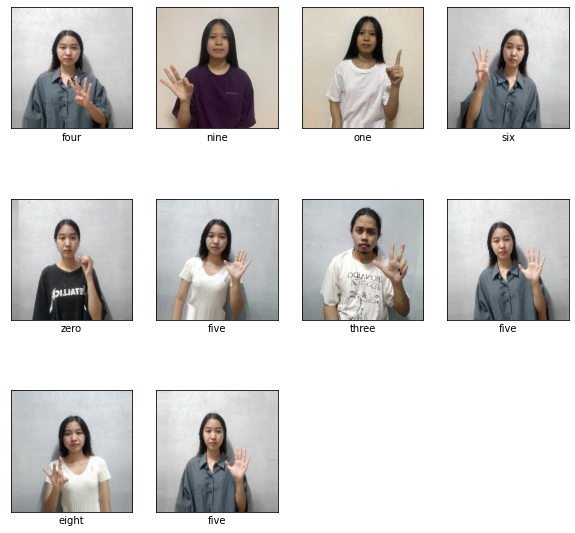

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].astype('int'))
    plt.xlabel(LABELS[train_labels[i].astype('int')])
plt.show()

In [ ]:
print('train set : ',train_images.shape)
print('test set : ',test_images.shape)
print('val set : ',val_images.shape)

train set :  (7504, 224, 224, 3)
test set :  (2502, 224, 224, 3)
val set :  (2501, 224, 224, 3)
